In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

Define Best Parameters for Each Algorithm

### FourPeaks

In [73]:
LENGTHS = [20, 40, 60, 80, 100]

bf1_rhc_list = []
bf1_sa_list = []
bf1_ga_list = []
bf1_mim_list = []

rhc_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
sa_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
ga_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
mimic_dict1 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}

for i in range(0, len(LENGTHS)):
    
    
    start = time.time()
    length = LENGTHS[i]
    print("Trying Input Length", str(length))
    
    rhc_dict1['lengths'].append(length)
    sa_dict1['lengths'].append(length)
    ga_dict1['lengths'].append(length)
    mimic_dict1['lengths'].append(length)
    
    # Step 1
    fitness1 = mlrose.FourPeaks(t_pct=0.1)
    
    # Step 2
    problem1 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness1, maximize = True, max_val = 2)

    # Step 3 
    # RHC 
    bs1_rhc, bf1_rhc, curve1_rhc = mlrose.random_hill_climb(problem = problem1, 
                                               max_attempts = 1000, max_iters = 1000, 
                                               restarts = int(.50*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict1['runtime'].append(end_rhc-start)
    rhc_dict1['best_fits'].append(bf1_rhc)
    rhc_dict1['fit_curves'].append(curve1_rhc)
    print("...Finished RHC in "+str(end_rhc-start))
    # SA 
    bs1_sa, bf1_sa, curve1_sa = mlrose.simulated_annealing(problem=problem1, 
                                               max_attempts=10, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict1['runtime'].append(end_sa-end_rhc)
    sa_dict1['best_fits'].append(bf1_sa)
    sa_dict1['fit_curves'].append(curve1_sa)
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs1_ga, bf1_ga, curve1_ga = mlrose.genetic_alg(problem=problem1, 
                                               pop_size = int(5*length), mutation_prob = 0.10,
                                               max_attempts=1000, max_iters = 100,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict1['runtime'].append(end_ga-end_sa)
    ga_dict1['best_fits'].append(bf1_ga)
    ga_dict1['fit_curves'].append(curve1_ga)
    print("...Finished GA in "+ str(end_ga-end_sa))
    
    # MIMIC 
    bs1_mim, bf1_mim, curve1_mim = mlrose.mimic(problem=problem1, 
                                               pop_size = int(5*length), keep_pct = 0.40,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
     
    end_mimic = time.time()
    mimic_dict1['runtime'].append(end_mimic-end_ga)
    mimic_dict1['best_fits'].append(bf1_mim)
    mimic_dict1['fit_curves'].append(curve1_mim)
    print("...Finished MIMIC in "+ str(end_mimic-end_ga))
    
    bf1_rhc_list.append(bf1_rhc)
    bf1_sa_list.append(bf1_sa)
    bf1_ga_list.append(bf1_ga)
    bf1_mim_list.append(bf1_mim)
    

print(bf1_rhc_list)
print(bf1_sa_list)
print(bf1_ga_list)
print(bf1_mim_list)

Trying Input Length 20
...Finished RHC in 0.18396711349487305
...Finished SA in 0.0028269290924072266
...Finished GA in 0.5589771270751953
...Finished MIMIC in 2.244501829147339
Trying Input Length 40
...Finished RHC in 0.36511898040771484
...Finished SA in 0.01263284683227539
...Finished GA in 1.1368613243103027
...Finished MIMIC in 9.360929727554321
Trying Input Length 60
...Finished RHC in 0.5234940052032471
...Finished SA in 0.020140886306762695


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 1.8234212398529053
...Finished MIMIC in 36.287776947021484
Trying Input Length 80
...Finished RHC in 0.6620728969573975
...Finished SA in 0.029664039611816406


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 2.6404800415039062
...Finished MIMIC in 80.48288798332214
Trying Input Length 100
...Finished RHC in 0.8232810497283936
...Finished SA in 0.03015589714050293


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 3.555561065673828
...Finished MIMIC in 84.30448794364929
[37.0, 40.0, 103.0, 48.0, 42.0]
[37.0, 64.0, 94.0, 23.0, 32.0]
[35.0, 60.0, 80.0, 104.0, 122.0]
[37.0, 59.0, 79.0, 112.0, 115.0]


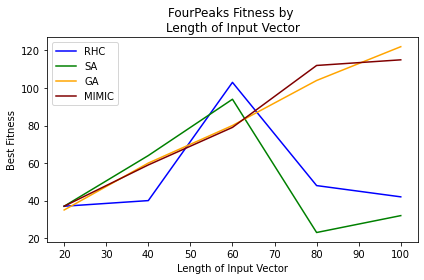

In [74]:
plt.clf()
plt.plot(rhc_dict1['lengths'], rhc_dict1['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("FourPeaks Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_Fitness.png")
plt.show()

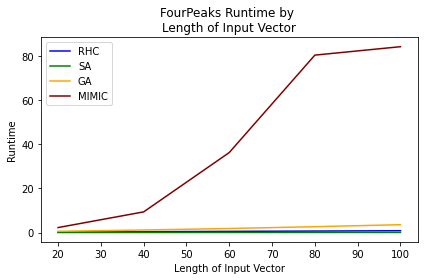

In [75]:
plt.clf()
plt.plot(rhc_dict1['lengths'], rhc_dict1['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict1['lengths'], sa_dict1['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict1['lengths'], ga_dict1['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict1['lengths'], mimic_dict1['runtime'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime")
plt.title("FourPeaks Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FourPeaks_Runtime.png")
plt.show()

In [81]:
LENGTHS = [20, 40, 60, 80, 100]

bf2_rhc_list = []
bf2_sa_list = []
bf2_ga_list = []
bf2_mim_list = []

rhc_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
sa_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
ga_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}
mimic_dict2 = { 'lengths' : [],
             'best_fits' : [],
             'runtime' : [], 
             'fit_curves' : []}

for i in range(0, len(LENGTHS)):
    start = time.time()
    length = LENGTHS[i]
    
    print("Trying Input Length", str(length))
    
    rhc_dict2['lengths'].append(length)
    sa_dict2['lengths'].append(length)
    ga_dict2['lengths'].append(length)
    mimic_dict2['lengths'].append(length)
    
    # Step 1
    fitness2 = mlrose.FlipFlop()
    
    # Step 2
    problem2 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness2, maximize = True, max_val = 2)
    
    # Step 3 
    # RHC 
    bs2_rhc, bf2_rhc, curve2_rhc = mlrose.random_hill_climb(problem = problem2, 
                                               max_attempts = 1000, max_iters = 100, 
                                               restarts = int(1.0*length), 
                                               random_state = 42, curve = True)
    end_rhc = time.time()
    rhc_dict2['runtime'].append(end_rhc-start)
    rhc_dict2['best_fits'].append(bf2_rhc)
    rhc_dict2['fit_curves'].append(curve2_rhc)
    print("...Finished RHC in "+str(end_rhc-start))
    
    # SA 
    bs2_sa, bf2_sa, curve2_sa = mlrose.simulated_annealing(problem=problem2, 
                                               max_attempts=100, max_iters = 1000, 
                                               schedule = mlrose.GeomDecay(),
                                               random_state = 42, curve = True)
    end_sa = time.time()
    sa_dict2['runtime'].append(end_sa-end_rhc)
    sa_dict2['best_fits'].append(bf2_sa)
    sa_dict2['fit_curves'].append(curve2_sa)
    print("...Finished SA in "+str(end_sa-end_rhc))

    # GA 
    bs2_ga, bf2_ga, curve2_ga = mlrose.genetic_alg(problem=problem2, 
                                               pop_size = int(2*length), mutation_prob = 0.20,
                                               max_attempts=1000, max_iters = 10,                                           
                                               random_state = 42, curve = True)
    end_ga = time.time()
    ga_dict2['runtime'].append(end_ga-end_sa)
    ga_dict2['best_fits'].append(bf2_ga)
    ga_dict2['fit_curves'].append(curve2_ga)
    print("...Finished GA in "+str(end_ga-end_sa))
    
    # MIMIC 
    bs2_mim, bf2_mim, curve2_mim = mlrose.mimic(problem=problem2, 
                                               pop_size = int(5*length), keep_pct = 0.40,
                                               max_attempts = 10, max_iters = 100,
                                               random_state = 42, curve = True)
    
    end_mimic = time.time()
    mimic_dict2['runtime'].append(end_mimic-end_ga)
    mimic_dict2['best_fits'].append(bf2_mim)
    mimic_dict2['fit_curves'].append(curve2_mim)
    print("...Finished MIMIC in "+str(end_mimic-end_ga))
    
    
    bf2_rhc_list.append(bf2_rhc)
    bf2_sa_list.append(bf2_sa)
    bf2_ga_list.append(bf2_ga)
    bf2_mim_list.append(bf2_mim)
    

print(bf2_rhc_list)
print(bf2_sa_list)
print(bf2_ga_list)
print(bf2_mim_list)

Trying Input Length 20
...Finished RHC in 0.04234170913696289
...Finished SA in 0.004389286041259766
...Finished GA in 0.03147482872009277
...Finished MIMIC in 2.1169211864471436
Trying Input Length 40
...Finished RHC in 0.08534908294677734
...Finished SA in 0.02666497230529785
...Finished GA in 0.06710290908813477


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished MIMIC in 13.121299028396606
Trying Input Length 60
...Finished RHC in 0.16370296478271484
...Finished SA in 0.03441596031188965
...Finished GA in 0.11923098564147949
...Finished MIMIC in 30.24852204322815
Trying Input Length 80
...Finished RHC in 0.2678089141845703
...Finished SA in 0.03970193862915039


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 0.1684398651123047
...Finished MIMIC in 51.22231602668762
Trying Input Length 100
...Finished RHC in 0.3778097629547119
...Finished SA in 0.04772615432739258


/Users/amandahutter/anaconda3/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


...Finished GA in 0.2353990077972412
...Finished MIMIC in 90.2451241016388
[18.0, 37.0, 54.0, 67.0, 81.0]
[19.0, 38.0, 54.0, 76.0, 92.0]
[16.0, 30.0, 42.0, 55.0, 69.0]
[19.0, 38.0, 55.0, 75.0, 93.0]


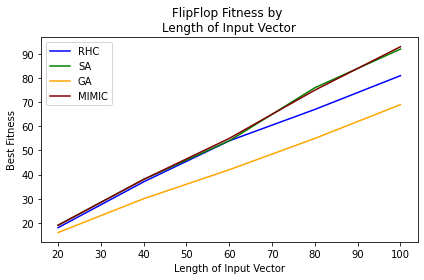

In [78]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['best_fits'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['best_fits'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['best_fits'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['best_fits'], label = "MIMIC", color = 'maroon')

plt.xlabel("Length of Input Vector")
plt.ylabel("Best Fitness")
plt.title("FlipFlop Fitness by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_Fitness.png")
plt.show()

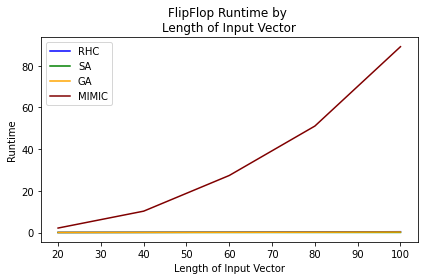

In [80]:
plt.clf()
plt.plot(rhc_dict2['lengths'], rhc_dict2['runtime'], label = "RHC", color = 'blue')
plt.plot(sa_dict2['lengths'], sa_dict2['runtime'], label = "SA", color = 'green')
plt.plot(ga_dict2['lengths'], ga_dict2['runtime'], label = "GA", color = 'orange')
plt.plot(mimic_dict2['lengths'], mimic_dict2['runtime'], label = "MIMIC", color = 'maroon')


plt.xlabel("Length of Input Vector")
plt.ylabel("Runtime")
plt.title("FlipFlop Runtime by \nLength of Input Vector")
plt.legend()
plt.tight_layout()
plt.savefig("Part1_FlipFlop_Runtime.png")
plt.show()